- [assignments 1 page](https://www.csie.ntu.edu.tw/~cyy/courses/vfx/22spring/assignments/proj1/)
- Author: R10944007 曾宏鈞, 許博翔 

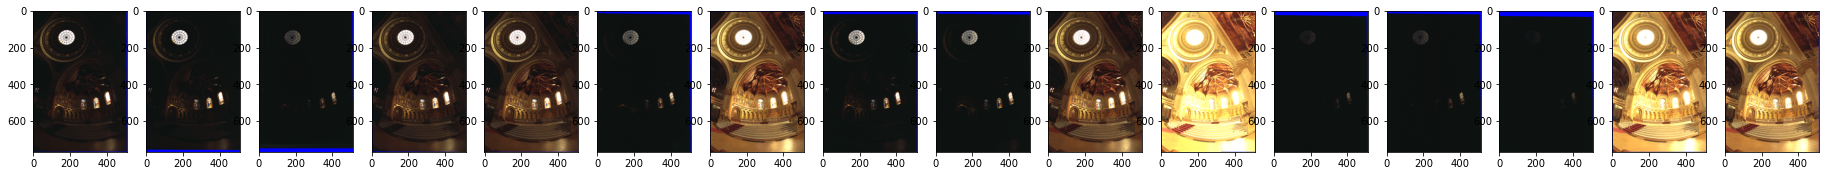

In [1]:
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt

path = "../data/Memorial_SourceImages/*png"
files = glob.glob(path)
images = [cv2.imread(f) for f in files]
shutter_speed  = np.array([1/32, 1/16, 1/8., 1/4, 1/2, 1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024])

plt.figure(figsize=(32,32))
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))

# Image Alignment 
- Median Threshold Bitmap Alignment (MTB)
    
    


In [3]:
def Gray(img):
    """
    convert image to grayscale
    """
    return np.array([[(54*x[2]+183*x[1]+19*x[0])/256 for x in y] for y in img], dtype="uint8")
def ImageShrink2(img):
    """
    shrink image by 2
    """
    return np.array( [[(int(img[y][x]) + int(img[y+1][x]) + int(img[y][x+1]) + int(img[y+1][x+1]))/4  for x in range(0, img.shape[1]-1, 2)] for y in range(0, img.shape[0]-1, 2)], dtype='uint8')
def ComputeBitmaps(img):
    """
    compute median threshold bitmap and exclusion bitmap
    """
    h, w = img.shape
    threshold = 10
    median = int( np.median(img) )
    threshold_bitmap = np.zeros((h,w))
    threshold_bitmap[ img>median ] = 1
    exclusion_bitmap = np.ones((h,w))
    exclusion_bitmap[ np.where(np.abs(img - median) <= threshold) ] = 0
    return threshold_bitmap, exclusion_bitmap
def BitmapShift(bm, x, y):
    """
    shift image by x, y
    """
    ans = bm.copy()
    if (x<0):
        ans[:, :-x] = ans[:, x:]
    elif (x>0):
        ans[:, x:] = ans[:, :-x]
    if (y<0):
        ans[:-y, :] = ans[y:, :]
    elif (y>0):
        ans[y:, :] = ans[:-y, :]    
    return ans


# ref: [1] - Overall algorithm
def getExpShift(img1, img2, shiftBits):
    if (shiftBits>0):
        sml_img1 = ImageShrink2(img1)
        sml_img2 = ImageShrink2(img2)
        cur_shift = getExpShift(sml_img1, sml_img2, shiftBits-1)
        cur_shift[0] *= 2
        cur_shift[1] *= 2
    else:
        cur_shift = [0,0]
    tb1, eb1 = ComputeBitmaps(img1)
    tb2, eb2 = ComputeBitmaps(img2)
    min_err = img1.shape[0] * img2.shape[1]
    for y in range(-1, 2):
        for x in range(-1, 2):
            xs = cur_shift[0] + x
            ys = cur_shift[1] + y
            shifted_tb2 = BitmapShift(tb2, xs, ys)
            shifted_eb2 = BitmapShift(eb2, xs, ys)
            diff_b = np.logical_xor(tb1, shifted_eb2)
            diff_b = np.logical_and(diff_b, eb1)
            diff_b = np.logical_and(diff_b, shifted_eb2)
            err = diff_b.sum()
            if (err<min_err):
                shift_ret = [xs, ys] 
                min_err = err
    return shift_ret 

level = 1
image_shifted = []
for i in range(1, len(images)):
    g1 = Gray(images[0]) 
    g2 = Gray(images[i]) 
    x, y = getExpShift(g1, g2, level)
    image_shifted.append(BitmapShift(images[i], x, y))
    print(x, y)

3 3
-2 3
3 3
3 3
2 3
3 3
3 3
2 3
3 3
3 3
1 3
-3 3
-3 3
3 1
3 3


In [ ]:
# recover camera response curve
# Paul Debevec's method
# return camera response function g
# 解 Ax=b np.linalg.lstsq(A, b)

sample = np.array(image_shifted.copy())
# Arguments
"""
Z: i pixel in j image
B: log(delta t)
l: constant of smoothness
w: weight of pixel z
"""
Z = sample.reshape((sample.shape[0], sample.shape[1]*sample.shape[2]*sample.shape[3]))
Z = Z.T
shutter_time = 1/shutter_speed
B = np.log(shutter_time)
l = 30 # 我隨便設
w = 






In [27]:
# Assumes
Zmin = 0
Zmax = 255
# 

n = 256 # sample of image
p = len(images) # number of images


A = np.zeros((n*p + 254+1, n+256))
B = np.zeros(n*p+255)
LAMBDA = 


## np
k=1
for i in range(1, )


(1179648, 15)

In [5]:
print( len(images), images[0].shape )

16 (768, 512, 3)


(768, 512, 3)


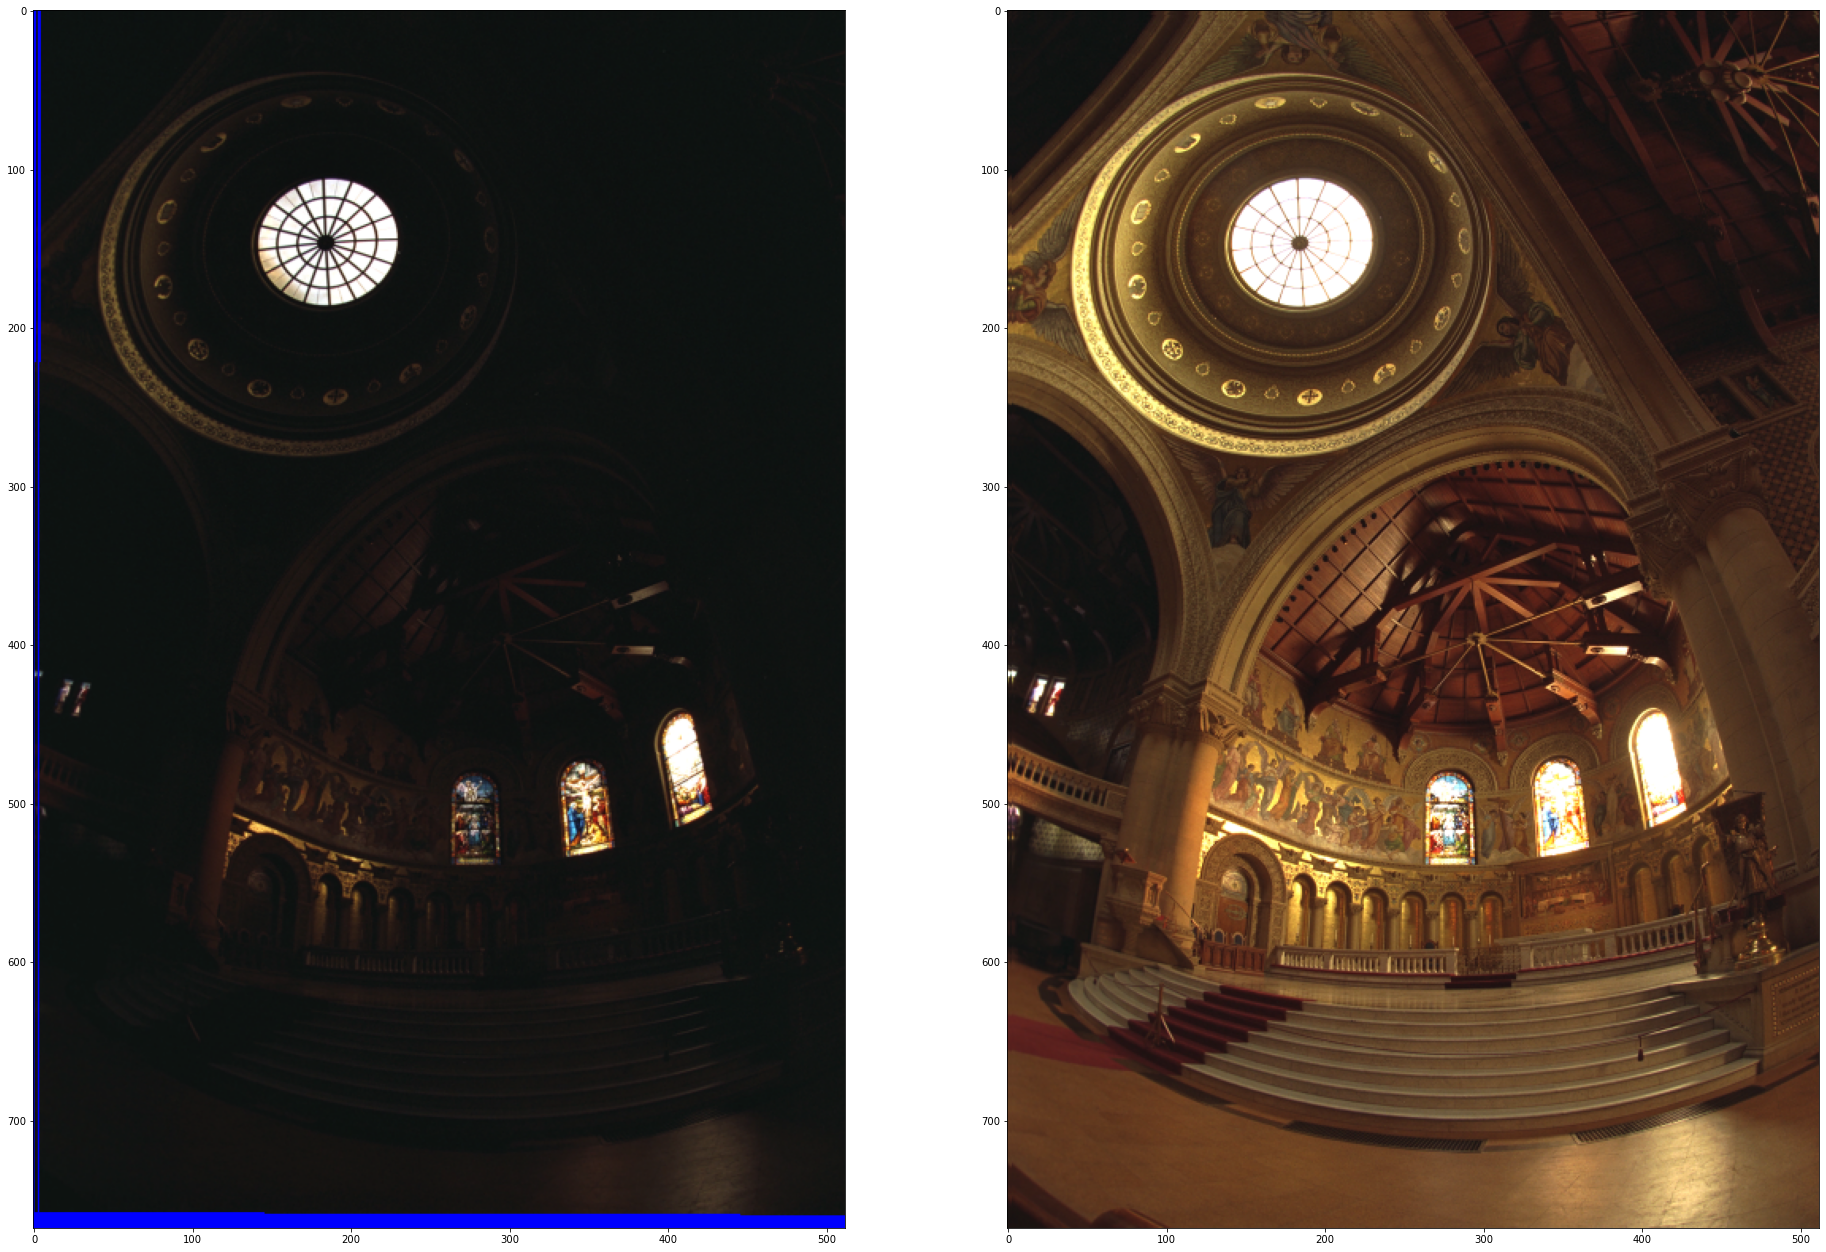

In [175]:
i=8
print(ans[i].shape)
plt.figure(figsize=(32,32))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(ans[0], cv2.COLOR_BGR2RGB))
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(ans[i], cv2.COLOR_BGR2RGB))

# Ref
1. Ward, G. (2003). Fast, robust image registration for compositing high dynamic range photographs from hand-held exposures. Journal of graphics tools, 8(2), 17-30.